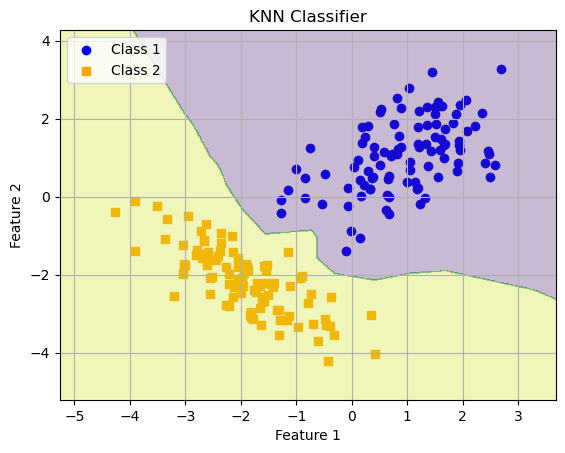

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def knn_classifier(X_train, y_train, X_test, k):
    """
    k-Nearest Neighbors (kNN) classifier.

    Parameters:
        X_train (ndarray): Training data features.
        y_train (ndarray): Training data labels.
        X_test (ndarray): Test data features.
        k (int): Number of neighbors.

    Returns:
        ndarray: Predicted labels for the test data.
    """
    predicted_labels = []

    for sample in X_test:
        distances = np.linalg.norm(X_train - sample, axis=1)
        nearest_indices = np.argsort(distances)[:k]
        nearest_labels = y_train[nearest_indices]
        unique_labels, counts = np.unique(nearest_labels, return_counts=True)
        predicted_labels.append(unique_labels[np.argmax(counts)])

    return np.array(predicted_labels)

# Example usage and demo
# Generate synthetic 2D data points for two classes using two Gaussian distributions
np.random.seed(0)
num_samples = 100
# True means and covariance matrices of the Gaussians generating the data from two classes
class_1_mean = np.array([1.0, 1.0])
class_2_mean = np.array([-2.0, -2.0])
# Let's use non-spherical classes (non-identity covariance matrix for each Gaussian)
class_1_cov = np.array([[0.8, 0.4], [0.4, 0.8]])
class_2_cov = np.array([[0.8, -0.6], [-0.6, 0.8]])

X_class_1 = np.random.multivariate_normal(class_1_mean, class_1_cov, num_samples)
X_class_2 = np.random.multivariate_normal(class_2_mean, class_2_cov, num_samples)

X_train = np.vstack((X_class_1, X_class_2))
y_train = np.hstack((np.zeros(num_samples), np.ones(num_samples)))


# Plot the original data and class means

plt.scatter(X_class_1[:, 0], X_class_1[:, 1], color='blue', marker='o', label='Class 1')
plt.scatter(X_class_2[:, 0], X_class_2[:, 1], color='orange',  marker='s', label='Class 2')


# The code below (next 3 lines) is just for plotting the decision boundary using color shading
# How: We generate a large number of test inputs on the 2D grid (since our space of inputs is also 2D), classify them
# using LwP and color each point based on its predicted label
# The color change implies the decision boundary


x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

k = 1 # can play with k to see if/how the decision boundary changes
Z = knn_classifier(X_train, y_train, np.c_[xx.ravel(), yy.ravel()],k)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Classifier')
plt.legend()
plt.grid(True)
plt.show()

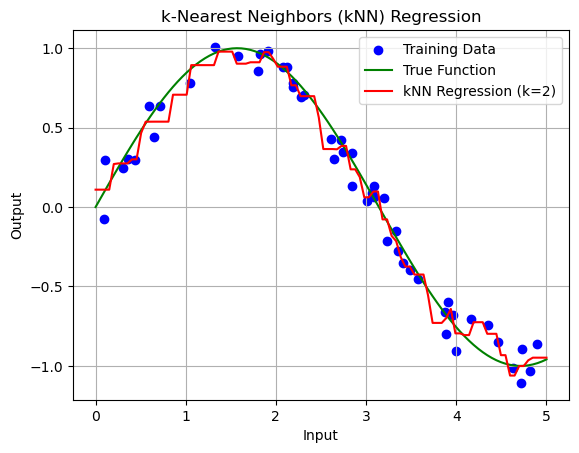

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def knn_regression(X_train, y_train, X_test, k):
    """
    k-Nearest Neighbors (kNN) regression.

    Parameters:
        X_train (ndarray): Training data features.
        y_train (ndarray): Training data labels (target values).
        X_test (ndarray): Test data features.
        k (int): Number of neighbors.

    Returns:
        ndarray: Predicted target values for the test data.
    """
    predicted_values = []

    for sample in X_test:
        distances = np.abs(X_train - sample)
        nearest_indices = np.argsort(distances)[:k]
        nearest_values = y_train[nearest_indices]
        predicted_values.append(np.mean(nearest_values))

    return np.array(predicted_values)

# Example usage and demo
# Generate synthetic 1D data points for regression
np.random.seed(0)
num_samples = 50
X_train = np.sort(5 * np.random.rand(num_samples))
y_train = np.sin(X_train) + 0.1 * np.random.randn(num_samples)  # True function with noise
X_test = np.linspace(0, 5, 100)

# Apply k-Nearest Neighbors (kNN) regression
k = 2  # Play with this value to see how the learned regression function's shape changes (note: for regresssion, it is okay to choose even value of k)
predicted_values = knn_regression(X_train, y_train, X_test, k)

# Plot the original data and the kNN regression curve
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_test, np.sin(X_test), color='green', label='True Function')
plt.plot(X_test, predicted_values, color='red', label=f'kNN Regression (k={k})')

plt.xlabel('Input')
plt.ylabel('Output')
plt.title('k-Nearest Neighbors (kNN) Regression')
plt.legend()
plt.grid(True)
plt.show()